In [1]:
!pip install transformers datasets seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 K

In [2]:
import transformers 
import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from datasets import load_dataset, load_metric, ClassLabel, Dataset, concatenate_datasets
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tf.get_logger().setLevel('ERROR')

In [3]:
datasets = load_dataset("truongpdd/NER-covid-vietnamese")
datasets

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5027 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/truongpdd___parquet/truongpdd--NER-covid-vietnamese-d727e01150c2b5a7/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 5027
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 2000
    })
})

In [4]:
labels = datasets['train']['ner_tags']
tmp = []
for label in labels:
  tmp = tmp + label
label_list = list(set(tmp))
label_list.sort()
print(label_list)

['B-AGE', 'B-DATE', 'B-GENDER', 'B-JOB', 'B-LOCATION', 'B-NAME', 'B-ORGANIZATION', 'B-PATIENT_ID', 'B-SYMPTOM_AND_DISEASE', 'B-TRANSPORTATION', 'I-AGE', 'I-DATE', 'I-GENDER', 'I-JOB', 'I-LOCATION', 'I-NAME', 'I-ORGANIZATION', 'I-PATIENT_ID', 'I-SYMPTOM_AND_DISEASE', 'I-TRANSPORTATION', 'O']


In [5]:
train_df = pd.DataFrame(datasets['train'])
val_df = pd.DataFrame(datasets['validation'])
train_df.head()

,tokens,ner_tags
0,"[Đồng, thời, ,, bệnh, viện, tiếp, tục, thực, h...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"["", Số, bệnh, viện, có, thể, tiếp, nhận, bệnh,...","[O, O, O, O, O, O, O, O, O, O, O, B-SYMPTOM_AN..."
2,"[Ngoài, ra, ,, những, người, tiếp, xúc, gián, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[Bà, này, khi, trở, về, quá, cảnh, Doha, (, Qa...","[O, O, O, O, O, O, O, B-LOCATION, O, B-LOCATIO..."
4,"["", Bệnh, nhân, 523, "", và, chồng, là, "", bệnh...","[O, O, O, B-PATIENT_ID, O, O, O, O, O, O, O, B..."


In [6]:
a = []
for tags in train_df['ner_tags']:
  tmp = []
  for tag in tags:
    if tag == 'O':
      continue
    tmp.append(tag)
  a = a + tmp
print(a)

['B-ORGANIZATION', 'I-ORGANIZATION', 'I-ORGANIZATION', 'B-SYMPTOM_AND_DISEASE', 'I-SYMPTOM_AND_DISEASE', 'B-SYMPTOM_AND_DISEASE', 'I-SYMPTOM_AND_DISEASE', 'B-LOCATION', 'B-LOCATION', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'B-DATE', 'B-PATIENT_ID', 'B-PATIENT_ID', 'B-AGE', 'B-ORGANIZATION', 'I-ORGANIZATION', 'I-ORGANIZATION', 'B-DATE', 'B-PATIENT_ID', 'B-NAME', 'B-DATE', 'I-DATE', 'I-DATE', 'B-PATIENT_ID', 'B-JOB', 'I-JOB', 'B-LOCATION', 'I-LOCATION', 'B-LOCATION', 'I-LOCATION', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'B-DATE', 'I-DATE', 'I-DATE', 'B-DATE', 'B-DATE', 'B-DATE', 'I-DATE', 'I-DATE', 'B-LOCATION', 'I-LOCATION', 'B-DATE', 'I-DATE', 'I-DATE', 'B-SYMPTOM_AND_DISEASE', 'I-SYMPTOM_AND_DISEASE', 'I-SYMPTOM_AND_DISEASE', 'B-DATE', 'I-DATE', 'I-DATE', 'B-PATIENT_ID', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-

<Axes: xlabel='count'>

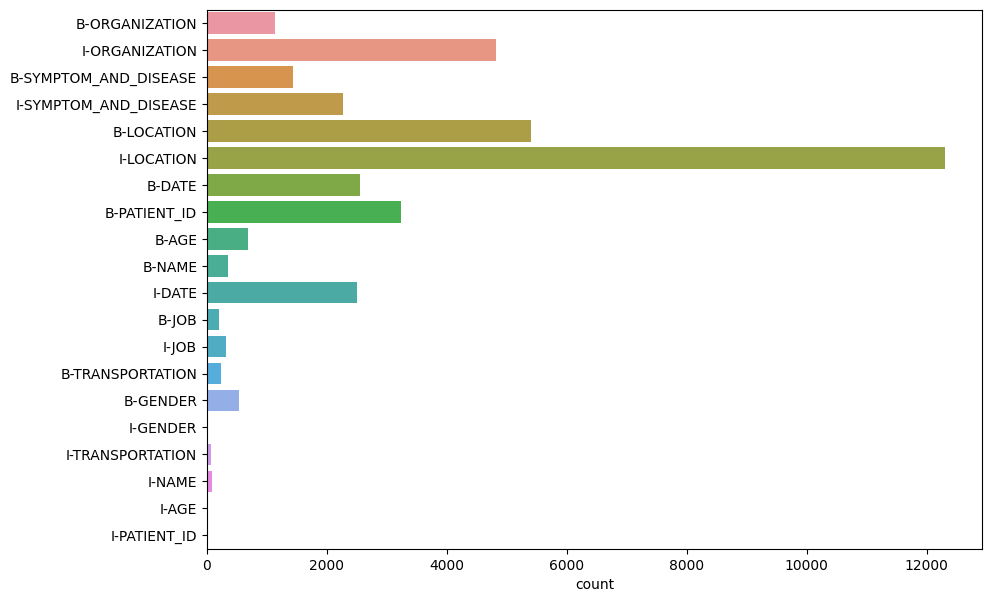

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.countplot(y=a)

In [ ]:
id2label = {i: label for i, label in enumerate(label_list)}
label2id = {label: i for i, label in enumerate(label_list)}

def conver_label_to_id(tags):
  result = []
  for tag in tags:
    result.append(label2id[tag])
  return result

In [ ]:
train_df['ner_tags'] = train_df['ner_tags'].apply(conver_label_to_id)
val_df['ner_tags'] = val_df['ner_tags'].apply(conver_label_to_id)
train_df.head()

,tokens,ner_tags
0,"[Đồng, thời, ,, bệnh, viện, tiếp, tục, thực, h...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2..."
1,"["", Số, bệnh, viện, có, thể, tiếp, nhận, bệnh,...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 8..."
2,"[Ngoài, ra, ,, những, người, tiếp, xúc, gián, ...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2..."
3,"[Bà, này, khi, trở, về, quá, cảnh, Doha, (, Qa...","[20, 20, 20, 20, 20, 20, 20, 4, 20, 4, 20, 20,..."
4,"["", Bệnh, nhân, 523, "", và, chồng, là, "", bệnh...","[20, 20, 20, 7, 20, 20, 20, 20, 20, 20, 20, 7,..."


In [ ]:
datasets = concatenate_datasets([Dataset.from_pandas(train_df), Dataset.from_pandas(val_df)])
datasets = datasets.train_test_split(test_size=0.1, shuffle=True)
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 6324
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 703
    })
})

In [ ]:
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(
        dataset
    ), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
        elif isinstance(typ, Sequence) and isinstance(typ.feature, ClassLabel):
            df[column] = df[column].transform(
                lambda x: [typ.feature.names[i] for i in x]
            )
    display(HTML(df.to_html()))
show_random_elements(datasets["train"])

,tokens,ner_tags
0,"[Sau, khi, xuất, viện, ,, bệnh, nhân, sẽ, được, đưa, vào, các, bệnh, viện, ở, Đà, Nẵng, để, tiếp, tục, điều, trị, bệnh, nền, .]","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 4, 14, 20, 20, 20, 20, 20, 20, 20, 20]"
1,"[Ngày, 17, -, 7, ,, khi, từ, Bệnh, viện, Đà, Nẵng, về, nhà, ,, bệnh, nhân, có, sốt, và, hơi, mệt, .]","[20, 1, 11, 11, 20, 20, 20, 4, 14, 14, 14, 20, 20, 20, 20, 20, 20, 8, 20, 8, 18, 20]"
2,"[Hiện, bệnh, nhân, N.V.V., đang, được, cách, ly, tại, phòng, khám, đa, khoa, Quang, Hà, ,, huyện, Bình, Xuyên, ,, tỉnh, Vĩnh, Phúc, và, trong, tình, trạng, sức, khoẻ, ổn, định, .]","[20, 20, 20, 5, 20, 20, 20, 20, 20, 4, 14, 14, 14, 14, 14, 20, 4, 14, 14, 20, 4, 14, 14, 20, 20, 20, 20, 20, 20, 20, 20, 20]"
3,"[Ngoài, ra, ,, ngày, 15, -, 8, ,, TP., HCM, có, thêm, 4, ca, bệnh, khác, nhập, cảnh, tại, cảng, hàng, không, quốc, tế, Tân, Sơn, Nhất, .]","[20, 20, 20, 20, 1, 11, 11, 20, 4, 14, 20, 20, 20, 20, 20, 20, 20, 20, 20, 4, 14, 14, 14, 14, 14, 14, 14, 20]"
4,"[Một, trong, số, đó, đã, đóng, cửa, vào, ngày, cuối, cùng, của, tháng, 7, ,, khi, nữ, công, nhân, của, cơ, sở, này, trở, thành, "", bệnh, nhân, 446, "", .]","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 1, 11, 20, 20, 2, 3, 13, 20, 20, 20, 20, 20, 20, 20, 20, 20, 7, 20, 20]"
5,"[Trước, đó, ,, Bệnh, viện, Đà, Nẵng, cũng, đã, chuyển, 7, bệnh, nhân, Covid, -, 19, nhẹ, lên, Bệnh, viện, phổi, để, điều, trị, .]","[20, 20, 20, 6, 16, 16, 16, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]"
6,"[Chiều, 7, -, 3, ,, Bộ, Y, tế, thông, tin, ca, mắc, COVID, -, 19, Em, bé, thứ, ba, sinh, mổ, ngày, 1/4, ,, con, của, một, nữ, nhân, viên, làm, việc, tại, khoa, Cấp, cứu, của, Bạch, Mai, .]","[20, 1, 11, 11, 20, 6, 16, 16, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 1, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 4, 14, 14, 20, 4, 14, 20]"
7,"[Một, người, nhà, bệnh, nhân, cho, hay, thi, thể, đã, nằm, đó, một, lúc, .]","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]"
8,"[Cụ, thể, ,, bao, gồm, cả, những, "", ca, lâm, sàng, "", ,, tức, bệnh, nhân, chỉ, cần, có, triệu, chứng, ho, hay, khó, thở, nhưng, chưa, xét, nghiệm, hay, chưa, có, kết, quả, âm, tính, với, virus, cũng, được, tính, là, một, ca, nhiễm, .]","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 8, 20, 8, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]"
9,"["", Bệnh, nhân, 164, "", ,, nam, ,, 23, tuổi, ,, ở, Rạch, Giá, ,, Kiên, Giang, ,, du, học, sinh, tại, Anh, ,, về, Việt, Nam, ngày, 23/3, trên, chuyến, bay, VN54, của, Vietnam, Airlines, ,, ghế, 22K, ,, nhập, cảnh, tại, sân, bay, Vân, Đồn, .]","[20, 20, 20, 7, 20, 20, 2, 20, 0, 20, 20, 20, 4, 14, 20, 4, 14, 20, 3, 13, 13, 20, 4, 20, 20, 4, 14, 20, 1, 20, 20, 20, 9, 20, 6, 16, 20, 20, 20, 20, 20, 20, 20, 4, 14, 14, 14, 20]"


# Preprocessing data

In [ ]:
model_checkpoint = "distilbert-base-multilingual-cased"

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
tokenizer.is_fast

True

In [ ]:
example = datasets['train'][8]
example

{'tokens': ['Ngày',
  '31/7',
  ',',
  'cô',
  'được',
  'cách',
  'ly',
  'tập',
  'trung',
  'tại',
  'trường',
  'Tiểu',
  'học',
  'Hoà',
  'Nhơn',
  '1',
  '(',
  'xã',
  'Hoà',
  'Nhơn',
  ')',
  'và',
  'ngày',
  '3/8',
  'nhận',
  'kết',
  'quả',
  'dương',
  'tính',
  'với',
  'nCoV',
  '.'],
 'ner_tags': [20,
  1,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  4,
  14,
  14,
  14,
  14,
  14,
  20,
  4,
  14,
  14,
  20,
  20,
  20,
  1,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20]}

In [ ]:
tokenized_input = tokenizer(example['tokens'], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
print(tokens)

['[CLS]', 'Ngày', '31', '/', '7', ',', 'cô', 'được', 'cách', 'ly', 'tập', 'trung', 'tại', 'trường', 'Tiểu', 'học', 'Ho', '##à', 'N', '##h', '##ơn', '1', '(', 'xã', 'Ho', '##à', 'N', '##h', '##ơn', ')', 'và', 'ngày', '3', '/', '8', 'nhận', 'kết', 'quả', 'dương', 'tính', 'với', 'n', '##C', '##o', '##V', '.', '[SEP]']


In [ ]:
print(example['ner_tags'])

[20, 1, 20, 20, 20, 20, 20, 20, 20, 20, 4, 14, 14, 14, 14, 14, 20, 4, 14, 14, 20, 20, 20, 1, 20, 20, 20, 20, 20, 20, 20, 20]


In [ ]:
len(example['ner_tags']), len(tokens), len(example['tokens'])

(32, 47, 32)

In [ ]:
print(tokenized_input.word_ids())

[None, 0, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 14, 14, 14, 15, 16, 17, 18, 18, 19, 19, 19, 20, 21, 22, 23, 23, 23, 24, 25, 26, 27, 28, 29, 30, 30, 30, 30, 31, None]


In [ ]:
# quy định chiến lược đặt tất cả token đặc biệt thành -100, các token phụ sẽ được đặt cùng một nhãn với token chính
label_all_tokens = True

In [ ]:
begin2inside = {
  label_list.index('B-AGE'): label_list.index('I-AGE'),
  label_list.index('B-DATE'): label_list.index('I-DATE'),
  label_list.index('B-GENDER'): label_list.index('I-GENDER'),
  label_list.index('B-JOB'): label_list.index('I-JOB'),
  label_list.index('B-LOCATION'): label_list.index('I-LOCATION'),
  label_list.index('B-NAME'): label_list.index('I-NAME'),
  label_list.index('B-ORGANIZATION'): label_list.index('I-ORGANIZATION'),
  label_list.index('B-PATIENT_ID'): label_list.index('I-PATIENT_ID'),
  label_list.index('B-SYMPTOM_AND_DISEASE'): label_list.index('I-SYMPTOM_AND_DISEASE'),
  label_list.index('B-TRANSPORTATION'): label_list.index('I-TRANSPORTATION'),
}

In [ ]:
def align_targets(labels, word_ids):
  aligned_labels = []
  last_word = None
  for word in word_ids:
    if word is None:
      # it's a token like [CLS]
      label = -100
    elif word != last_word:
      # it's a new word!
      label = labels[word]
    else:
      # it's the same word as before
      label = labels[word]

      # change B-<tag> to I-<tag> if necessary
      if label in begin2inside:
        label = begin2inside[label]

    # add the label 
    aligned_labels.append(label)

    # update last word
    last_word = word

  return aligned_labels

In [ ]:
print(align_targets(example['ner_tags'], tokenized_input.word_ids()))

[-100, 20, 1, 11, 11, 20, 20, 20, 20, 20, 20, 20, 20, 4, 14, 14, 14, 14, 14, 14, 14, 14, 20, 4, 14, 14, 14, 14, 14, 20, 20, 20, 1, 11, 11, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, -100]


In [ ]:
# tokenize both inputs and targets
def tokenize_fn(batch):
  # tokenize the input sequence first
  # this populates input_ids, attention_mask, etc.
  tokenized_inputs = tokenizer(
    batch['tokens'], truncation=True, is_split_into_words=True
  )

  labels_batch = batch['ner_tags'] # original targets
  aligned_labels_batch = []
  for i, labels in enumerate(labels_batch):
    word_ids = tokenized_inputs.word_ids(i)
    aligned_labels_batch.append(align_targets(labels, word_ids))
  
  # recall: the 'target' must be stored in key called 'labels'
  tokenized_inputs['labels'] = aligned_labels_batch

  return tokenized_inputs

In [ ]:
# Áp dụng cho dataset
tokenized_datasets = datasets.map(tokenize_fn, batched=True, remove_columns=datasets['train'].column_names)

Map:   0%|          | 0/6324 [00:00<?, ? examples/s]

Map:   0%|          | 0/703 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets['train']

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 6324
})

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# 3. Fine-tuning the model

In [ ]:
from transformers import TFAutoModelForTokenClassification


id2label = {i: label for i, label in enumerate(label_list)}
label2id = {label: i for i, label in enumerate(label_list)}

model = TFAutoModelForTokenClassification.from_pretrained(
    model_checkpoint, num_labels=len(label_list), id2label=id2label, label2id=label2id, from_pt=True
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForTokenClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a dow

In [ ]:
from transformers import create_optimizer

batch_size = 16
num_train_epochs = 5
num_train_steps = (len(tokenized_datasets['train']) // batch_size) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0
)

model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [ ]:
train_ds = model.prepare_tf_dataset(
    tokenized_datasets['train'],
    shuffle=True,
    batch_size=batch_size,
    collate_fn=data_collator
)

val_ds = model.prepare_tf_dataset(
    tokenized_datasets['test'],
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator
)

In [ ]:
import numpy as np
from transformers.keras_callbacks import KerasMetricCallback

metric = load_metric('seqeval')
labels = [label_list[i] for i in example['ner_tags']]
metric.compute(predictions=[labels], references=[labels])


{'DATE': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'LOCATION': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [ ]:
def compute_matrics(p):
  predictions, labels = p
  predictions =   np.argmax(predictions, axis=2)

  # Xóa token đặc biệt
  true_predictions = [
      [label_list[p] for (p,l) in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)
  ]
  true_labels = [
      [label_list[l] for (p,l) in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)
  ]

  results = metric.compute(predictions=true_predictions, references=true_labels)
  return {
      'precision': results['overall_precision'],
      'recall': results['overall_recall'],
      'f1': results['overall_f1'],
      'accuracy': results['overall_accuracy']
  }

metric_callback = KerasMetricCallback(
    metric_fn=compute_matrics, eval_dataset=val_ds
)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./tc_model_save/logs")

callbacks = [metric_callback, tensorboard_callback]

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=num_train_epochs,
                    batch_size=batch_size,
                    callbacks=callbacks)

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:717: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)


395/395 [==============================] - 106s 241ms/step - loss: 0.3005 - val_loss: 0.1104 - precision: 0.8858 - recall: 0.9188 - f1: 0.9020 - accuracy: 0.9684
Epoch 2/5
395/395 [==============================] - 86s 217ms/step - loss: 0.0756 - val_loss: 0.0878 - precision: 0.9015 - recall: 0.9511 - f1: 0.9256 - accuracy: 0.9756
Epoch 3/5
395/395 [==============================] - 85s 215ms/step - loss: 0.0468 - val_loss: 0.0722 - precision: 0.9264 - recall: 0.9562 - f1: 0.9411 - accuracy: 0.9814
Epoch 4/5
395/395 [==============================] - 85s 214ms/step - loss: 0.0324 - val_loss: 0.0672 - precision: 0.9327 - recall: 0.9584 - f1: 0.9454 - accuracy: 0.9834
Epoch 5/5
395/395 [==============================] - 85s 215ms/step - loss: 0.0255 - val_loss: 0.0725 - precision: 0.9279 - recall: 0.9553 - f1: 0.9414 - accuracy: 0.9827


In [ ]:
!tensorboard dev upload --logdir ./tc_model_save/logs \
  --name "VN NER with distilbert-base-multilingual-cased" \
  --description "Training results for Vietnamese NER with fine-tuning distilbert-base-multilingual-cased" \
  --one_shot

2023-04-05 15:12:57.825576: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tc_model_save/logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   KSB-KWN-FYD



New experiment created. View your TensorBoard at: https://tensorboard.dev

In [ ]:
import pickle 
save_path = 'ner_vn'
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

('ner_vn/tokenizer_config.json',
 'ner_vn/special_tokens_map.json',
 'ner_vn/vocab.txt',
 'ner_vn/added_tokens.json',
 'ner_vn/tokenizer.json')

# using 

In [ ]:
sample_sentence = "Đồng thời, bệnh viện tiếp tục thực hiện các biện pháp phòng chống dịch bệnh COVID - 19 theo hướng dẫn của Bộ Y tế."

In [ ]:
from transformers import pipeline

ner = pipeline(
    'token-classification',
    model=save_path,
    tokenizer=save_path,
    aggregation_strategy='simple'
)

Some layers from the model checkpoint at ner_vn were not used when initializing TFDistilBertForTokenClassification: ['dropout_115']
- This IS expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForTokenClassification were not initialized from the model checkpoint at ner_vn and are newly initialized: ['dropout_135']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
ner(sample_sentence)

[{'entity_group': 'ORGANIZATION',
  'score': 0.99377275,
  'word': 'Bộ Y tế',
  'start': 106,
  'end': 113}]

In [ ]:
ner('khi tôi ở Sài Gòn, tôi đã vị nhiễm ncovi. tôi bị cách ly ở bệnh viện Nhi Đồng, lúc đó tôi 19 tuổi và đó là ngày 20/11')

[{'entity_group': 'LOCATION',
  'score': 0.9939684,
  'word': 'Sài Gòn',
  'start': 10,
  'end': 17},
 {'entity_group': 'LOCATION',
  'score': 0.99087507,
  'word': 'bệnh viện Nhi Đồng',
  'start': 59,
  'end': 77},
 {'entity_group': 'DATE',
  'score': 0.995831,
  'word': '20 / 11',
  'start': 112,
  'end': 117}]

In [ ]:
ner('bệnh covid bắt nguồn từ Vũ Hán, Trung quốc')

[{'entity_group': 'LOCATION',
  'score': 0.99662817,
  'word': 'Vũ Hán',
  'start': 24,
  'end': 30},
 {'entity_group': 'LOCATION',
  'score': 0.99584883,
  'word': 'Trung quốc',
  'start': 32,
  'end': 42}]

In [ ]:
ner("tôi tên là Dũng")

[{'entity_group': 'NAME',
  'score': 0.8796618,
  'word': 'Dũng',
  'start': 11,
  'end': 15}]